# 作業
### 用 digits (dataset.load_digits()) 資料嘗試跑 t-SNE

### 載入套件

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold, datasets
#from matplotlib import rcParams
#rcParams['figure.figsize'] = (20.0, 10.0)

%matplotlib inline

### 載入 digits 資料集

In [20]:
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target

### 設計模型 估計參數

In [11]:
n_samples, n_features = X.shape
n_neighbors = 30
tsne = manifold.TSNE(n_components=2, random_state=0, init='pca', learning_rate=200., early_exaggeration=12.)

### 資料建模並視覺化結果

In [26]:
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(20,10))
    ax = plt.subplot(111)
    
    # 畫出數字
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 12})

    # hasattr() 函數用於判斷對象是否包含對應的屬性
    # hasattr(object, name), object: 對象, name: 屬性名
    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            # np.r_: Translates slice objects to concatenation along the first axis.
            #        This is a simple way to build up arrays quickly.
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")

Computing t-SNE embedding


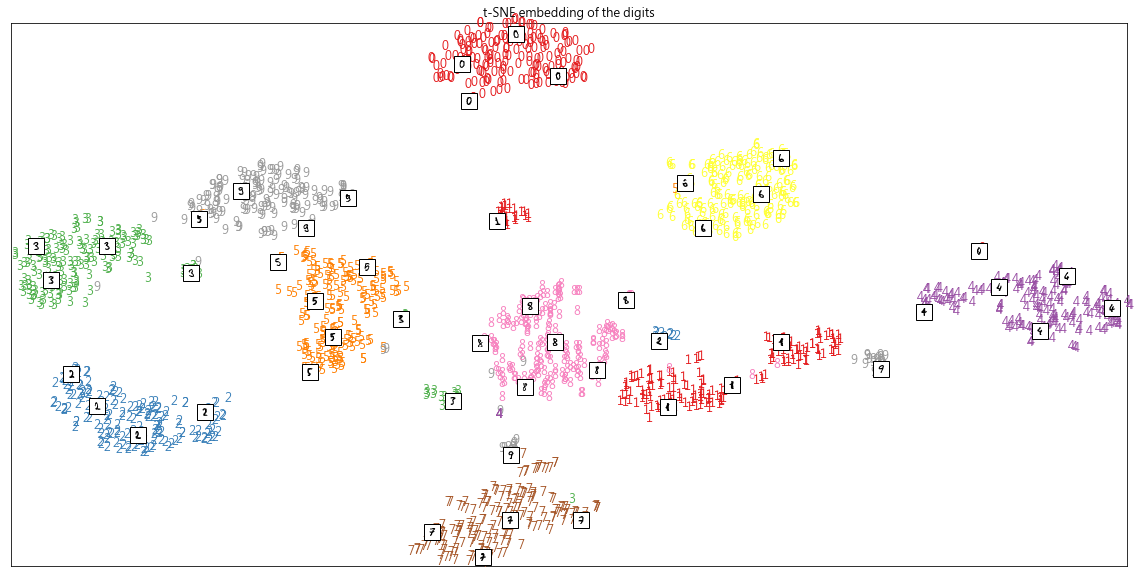

In [27]:
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne, "t-SNE embedding of the digits")

plt.show()